In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.model_selection import train_test_split
os.chdir("C:\Work_NN\PythonDirectory\Sales_prediction")

In [3]:
import statsmodels.api as sm

C:\Users\nNaaz\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
df_trans=pd.read_excel('TransactionData.xlsx')
df_nacs=pd.read_excel('02. Convert Nacs To POG 5-22-17.xlsx')
df_tran_pog=pd.merge(df_trans, df_nacs, how='left',on='NACS Category')
df_inline=df_tran_pog[df_tran_pog['Planogram'] =='Inline Candy' ]
df_inline_1=df_inline.groupby(['Sold-to Customer']).sum().reset_index()
df_store=pd.read_csv('StoreLayout.csv')
df_store['Id']=df_store['Id'].str[2:]
df_store=df_store.drop_duplicates(subset=['Store_Name__c'])
remove_cols = [col for col in df_store.columns if 'Setup_Notes' in col or  'Present' in col or  'Rows' in col
              or  'Shelves' in col]
print(remove_cols)
df_store.drop(columns=remove_cols,inplace=True)

df_store['In_Line_Candy_Height__c'].fillna(4.5,inplace =True)
df_store['In_Line_Candy_Width__c'].fillna(8,inplace =True)
df_sfdc=pd.read_excel('Updated Account ID conversion.xlsx')
df_tran=pd.merge(df_store, df_sfdc, how='left',left_on='Store_Name__c',right_on='Account ID')
df_input=pd.merge(df_inline_1,df_tran,how='inner',left_on='Sold-to Customer',right_on='SAP_Customer_Number__c')
df_temp=df_input[['Sold-to Customer','Qty','Sales','BAC','FC','Account ID',
                 'In_Line_Candy_Height__c','In_Line_Candy_Width__c']]
df_temp['area']=df_temp['In_Line_Candy_Height__c']*df_temp['In_Line_Candy_Width__c']
df_temp.drop(columns=['In_Line_Candy_Height__c','In_Line_Candy_Width__c','BAC','FC','Qty'],inplace=True)
df_inline2=df_temp[df_temp.area>0]
df_custData=pd.read_excel('01. Customer Master Information.xlsx')
df_inline2 = pd.merge(df_inline2,df_custData[['Sold-to Customer','Region','Customer Group']],on='Sold-to Customer', how='left')
df_gap=pd.read_excel('10. Number of GAPs.xlsx')
df_gap=df_gap.rename(columns={'Customer':'Sold-to Customer'})
df_inline2 = pd.merge(df_inline2,df_gap[['Sold-to Customer','Number of GAPs']],on='Sold-to Customer', how='left')
df_actvMnth=pd.read_csv('06. Active Month by Customer.csv')
df_inline2 = pd.merge(df_inline2,df_actvMnth[['Sold-to Customer','Active Month']],on='Sold-to Customer', how='left')
df_inline2['SalesPerMonth']=df_inline2['Sales']/df_inline2['Active Month']
df_cig=pd.read_csv('CigaretteData.csv')
df_cig=df_cig[['Sold-to Customer','cig_index']]
df_inp=pd.merge(df_inline2,df_cig,on='Sold-to Customer',how='left')
df_inp['cig_index'].fillna(np.mean(df_inp['cig_index']),inplace=True)
df_inp['MonthlyCigIndex']=df_inp['cig_index']/df_inp['Active Month']
df_inp = pd.merge(df_inp,df_custData[['Sold-to Customer','City','Postal Code','Plant Name']],on='Sold-to Customer', how='left')
df_pop=pd.read_excel('08. 2014 Median Age and Population by Zip.xlsx')
df_pop=df_pop.rename(columns={'ZIP':'Postal Code'})
df_inp=pd.merge(df_inp,df_pop,on='Postal Code',how='left')
df_inp.head()

C:\Users\nNaaz\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (16,22,26,28,69,70,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


['Breakfast_Nutrition_Peg_Rows__c', 'Breakfast_Nutrition_Shelf_Rows__c', 'Choc_Non_Choc_Rows_of_Shelves__c', 'Combined_Cookies_Breakfast_Shelf_Rows__c', 'Combined_Snuff_Cigars_Shelves__c', 'Combined_Cookies_Breakfast_Peg_Rows__c', 'Cookies_Sweet_Snacks_Shelf_Rows__c', 'Gum_Mint_Shelf_Rows__c', 'HBC_Rows_of_Pegs__c', 'HBC_Shelf_Rows__c', 'Meat_Stick_Rack_Tiers_Shelves__c', 'Novelty_Candy_Shelf_Rows__c', 'Nuts_Seeds_Shelf_Rows_Above_Peg__c', 'Nuts_Seeds_Shelf_Rows_Below_Peg__c', 'Peg_Candy_Rows__c', 'Reg_Candy_Sec_1_Shelves__c', 'Reg_Candy_Sec_2_Shelves__c', 'Reg_Candy_Sec_3_Shelves__c', 'Reg_Candy_Sec_4_Shelves__c', 'Reg_Candy_Sec_5_Shelves__c', 'Reg_Candy_Sec_6_Shelves__c', 'Salty_Shelves_Above_Peg__c', 'Salty_Shelf_Rows_Below_Peg__c', 'Theater_Over_Gondola_Rows__c', 'Theatre_Candy_Shelf_Rows__c', 'OTP_Moist_Cigars_Present__c', 'In_Line_Candy_Present__c', 'Peg_Candy_Present__c', 'Register_Candy_Present__c', 'HBC_Present__c', 'Meat_Snacks_Present__c', 'Cookies_Sweet_Snacks_Present__c', 

C:\Users\nNaaz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\nNaaz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Sold-to Customer,Sales,Account ID,area,Region,Customer Group,Number of GAPs,Active Month,SalesPerMonth,cig_index,MonthlyCigIndex,City,Postal Code,Plant Name,Population,Median_age
0,10000,312.35,0016100000Am390AAB,32.0,MI,CSTORE-OVER 800SQFT,20.0,12,26.029167,1786.1,148.841667,WEST BRANCH,48661,Ypsilanti,10067.0,48.5
1,10010,6616.20,0016100000AmFkZAAV,60.0,MI,CSTORE-OVER 800SQFT,4.0,12,551.350000,188.0,15.666667,DEXTER,48130,Ypsilanti,15209.0,38.6
2,10016,4976.42,0016100000Am392AAB,36.0,MI,CSTORE-OVER 800SQFT,NaN,12,414.701667,608.0,50.666667,SOUTH LYON,48178,Ypsilanti,30288.0,41.1
3,10019,1041.17,0016100000Am393AAB,36.0,MI,CSTORE-OVER 800SQFT,14.0,12,86.764167,5780.0,481.666667,STURGIS,49091,Ypsilanti,19661.0,36.9
4,10032,15739.22,00161000009lKUeAAM,36.0,MI,CSTORE-OVER 800SQFT,7.0,12,1311.601667,8181.7,681.808333,HARBOR BEACH,48441,Ypsilanti,3848.0,46.5


In [5]:
df_inp['Customer Group'].unique()

array(['CSTORE-OVER 800SQFT', 'LIQUOR STORE', 'CSTORE-UNDER 800SQFT',
       'VENDOR-WHOLESALER WI', 'TOBACCO OUTLET', 'OTHER/NON-RETAIL',
       'EBY INTERNAL ACCOUNT'], dtype=object)

In [6]:
df_CGovr=df_inp[df_inp['Customer Group'] == 'CSTORE-OVER 800SQFT']
df_CGliqr=df_inp[df_inp['Customer Group'] == 'LIQUOR STORE']
df_CGundr=df_inp[df_inp['Customer Group'] == 'CSTORE-UNDER 800SQFT']
df_CGvndr=df_inp[df_inp['Customer Group'] == 'VENDOR-WHOLESALER WI']
df_CGtob=df_inp[df_inp['Customer Group'] == 'TOBACCO OUTLET']
df_CGothr=df_inp[df_inp['Customer Group'] == 'OTHER/NON-RETAIL']
df_CGeby=df_inp[df_inp['Customer Group'] == 'EBY INTERNAL ACCOUNT']
print ('over 800: ', df_CGovr.shape)
print ('liquor: ',df_CGliqr.shape)
print ('under 800: ',df_CGundr.shape)
print ('vendor: ',df_CGvndr.shape)
print ('tobacco: ',df_CGtob.shape)
print ('other: ',df_CGothr.shape)
print ('Eby: ',df_CGeby.shape)


over 800:  (2922, 16)
liquor:  (93, 16)
under 800:  (521, 16)
vendor:  (4, 16)
tobacco:  (102, 16)
other:  (1, 16)
Eby:  (4, 16)


In [7]:
df_CGovr.head(20)

,Sold-to Customer,Sales,Account ID,area,Region,Customer Group,Number of GAPs,Active Month,SalesPerMonth,cig_index,MonthlyCigIndex,City,Postal Code,Plant Name,Population,Median_age
0,10000,312.35,0016100000Am390AAB,32.0,MI,CSTORE-OVER 800SQFT,20.0,12,26.029167,1786.1,148.841667,WEST BRANCH,48661,Ypsilanti,10067.0,48.5
1,10010,6616.20,0016100000AmFkZAAV,60.0,MI,CSTORE-OVER 800SQFT,4.0,12,551.350000,188.0,15.666667,DEXTER,48130,Ypsilanti,15209.0,38.6
2,10016,4976.42,0016100000Am392AAB,36.0,MI,CSTORE-OVER 800SQFT,NaN,12,414.701667,608.0,50.666667,SOUTH LYON,48178,Ypsilanti,30288.0,41.1
3,10019,1041.17,0016100000Am393AAB,36.0,MI,CSTORE-OVER 800SQFT,14.0,12,86.764167,5780.0,481.666667,STURGIS,49091,Ypsilanti,19661.0,36.9
4,10032,15739.22,00161000009lKUeAAM,36.0,MI,CSTORE-OVER 800SQFT,7.0,12,1311.601667,8181.7,681.808333,HARBOR BEACH,48441,Ypsilanti,3848.0,46.5
5,10036,2256.23,00161000009lKUiAAM,32.0,MI,CSTORE-OVER 800SQFT,8.0,12,188.019167,2143.9,178.658333,ST JOHNS,48879,Ypsilanti,18468.0,39.1
7,10060,1251.39,00161000009lKUpAAM,12.0,MI,CSTORE-OVER 800SQFT,NaN,12,104.282500,2383.0,198.583333,TROY,48084,Ypsilanti,14573.0,37.7
8,10062,7457.49,00161000009lKUqAAM,32.0,MI,CSTORE-OVER 800SQFT,4.0,12,621.457500,4439.4,369.950000,AUBURN HILLS,48326,Ypsilanti,20589.0,33.7
9,10065,14471.98,0016100000AmFkaAAF,48.0,MI,CSTORE-OVER 800SQFT,6.0,12,1205.998333,7346.0,612.166667,LAPEER,48446,Ypsilanti,30540.0,44.2
10,10077,7579.85,00161000009lKUtAAM,48.0,OH,CSTORE-OVER 800SQFT,7.0,12,631.654167,4393.5,366.125000,PARMA,44134,Ypsilanti,38493.0,43.5


In [8]:
df_tax=pd.read_csv('09. Taxing Jurisdiction.csv')
df_tax.head()

,Sold-to Customer,Taxing Jurisdiction,Taxing Area
0,10000,MI-013,Michigan
1,10010,MI-013,Michigan
2,10016,MI-013,Michigan
3,10019,MI-013,Michigan
4,10032,MI-013,Michigan


In [9]:
df_input=pd.merge(df_CGovr,df_tax[['Sold-to Customer','Taxing Jurisdiction']],on='Sold-to Customer',how='left')
df_input.head()

,Sold-to Customer,Sales,Account ID,area,Region,Customer Group,Number of GAPs,Active Month,SalesPerMonth,cig_index,MonthlyCigIndex,City,Postal Code,Plant Name,Population,Median_age,Taxing Jurisdiction
0,10000,312.35,0016100000Am390AAB,32.0,MI,CSTORE-OVER 800SQFT,20.0,12,26.029167,1786.1,148.841667,WEST BRANCH,48661,Ypsilanti,10067.0,48.5,MI-013
1,10010,6616.20,0016100000AmFkZAAV,60.0,MI,CSTORE-OVER 800SQFT,4.0,12,551.350000,188.0,15.666667,DEXTER,48130,Ypsilanti,15209.0,38.6,MI-013
2,10016,4976.42,0016100000Am392AAB,36.0,MI,CSTORE-OVER 800SQFT,NaN,12,414.701667,608.0,50.666667,SOUTH LYON,48178,Ypsilanti,30288.0,41.1,MI-013
3,10019,1041.17,0016100000Am393AAB,36.0,MI,CSTORE-OVER 800SQFT,14.0,12,86.764167,5780.0,481.666667,STURGIS,49091,Ypsilanti,19661.0,36.9,MI-013
4,10032,15739.22,00161000009lKUeAAM,36.0,MI,CSTORE-OVER 800SQFT,7.0,12,1311.601667,8181.7,681.808333,HARBOR BEACH,48441,Ypsilanti,3848.0,46.5,MI-013


In [10]:
dummy=pd.get_dummies(df_input['Taxing Jurisdiction'],prefix='TaxJurisdiction',prefix_sep='_')
dummy.head()

,TaxJurisdiction_AL-043,TaxJurisdiction_AL-058,TaxJurisdiction_AL-070,TaxJurisdiction_AL-104,TaxJurisdiction_AL-106,TaxJurisdiction_AL-130,TaxJurisdiction_AL-142,TaxJurisdiction_AL-163,TaxJurisdiction_AL-169,TaxJurisdiction_AL-172,...,TaxJurisdiction_MN-016,TaxJurisdiction_MO-027,TaxJurisdiction_NY-53,TaxJurisdiction_OH-014,TaxJurisdiction_OH-033,TaxJurisdiction_PA-055,TaxJurisdiction_SC-059,TaxJurisdiction_TN-088,TaxJurisdiction_WI-008,TaxJurisdiction_WV-032
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df=pd.concat([df_input,dummy],axis=1)
df.merge(dummy,left_index=True,right_index=True)
df.head()

,Sold-to Customer,Sales,Account ID,area,Region,Customer Group,Number of GAPs,Active Month,SalesPerMonth,cig_index,...,TaxJurisdiction_MN-016,TaxJurisdiction_MO-027,TaxJurisdiction_NY-53,TaxJurisdiction_OH-014,TaxJurisdiction_OH-033,TaxJurisdiction_PA-055,TaxJurisdiction_SC-059,TaxJurisdiction_TN-088,TaxJurisdiction_WI-008,TaxJurisdiction_WV-032
0,10000,312.35,0016100000Am390AAB,32.0,MI,CSTORE-OVER 800SQFT,20.0,12,26.029167,1786.1,...,0,0,0,0,0,0,0,0,0,0
1,10010,6616.20,0016100000AmFkZAAV,60.0,MI,CSTORE-OVER 800SQFT,4.0,12,551.350000,188.0,...,0,0,0,0,0,0,0,0,0,0
2,10016,4976.42,0016100000Am392AAB,36.0,MI,CSTORE-OVER 800SQFT,NaN,12,414.701667,608.0,...,0,0,0,0,0,0,0,0,0,0
3,10019,1041.17,0016100000Am393AAB,36.0,MI,CSTORE-OVER 800SQFT,14.0,12,86.764167,5780.0,...,0,0,0,0,0,0,0,0,0,0
4,10032,15739.22,00161000009lKUeAAM,36.0,MI,CSTORE-OVER 800SQFT,7.0,12,1311.601667,8181.7,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df.dropna(subset=['Number of GAPs'],inplace=True)

In [13]:
df.shape

(1936, 55)

In [14]:
#os.makedirs('out')
writer = pd.ExcelWriter('inputfile_salesPred.xlsx')
df.to_excel(writer,'inputfile_grp1')
writer.save()

In [15]:
df.columns

Index(['Sold-to Customer', 'Sales', 'Account ID', 'area', 'Region',
       'Customer Group', 'Number of GAPs', 'Active Month', 'SalesPerMonth',
       'cig_index', 'MonthlyCigIndex', 'City', 'Postal Code', 'Plant Name',
       'Population', 'Median_age', 'Taxing Jurisdiction',
       'TaxJurisdiction_AL-043', 'TaxJurisdiction_AL-058',
       'TaxJurisdiction_AL-070', 'TaxJurisdiction_AL-104',
       'TaxJurisdiction_AL-106', 'TaxJurisdiction_AL-130',
       'TaxJurisdiction_AL-142', 'TaxJurisdiction_AL-163',
       'TaxJurisdiction_AL-169', 'TaxJurisdiction_AL-172',
       'TaxJurisdiction_AL-195', 'TaxJurisdiction_AL-197',
       'TaxJurisdiction_AL-198', 'TaxJurisdiction_AL-201',
       'TaxJurisdiction_AL-205', 'TaxJurisdiction_AL-208',
       'TaxJurisdiction_AL-210', 'TaxJurisdiction_GA-057',
       'TaxJurisdiction_IA-006', 'TaxJurisdiction_IL-000',
       'TaxJurisdiction_IL-001', 'TaxJurisdiction_IL-007',
       'TaxJurisdiction_IL-011', 'TaxJurisdiction_IL-017',
       'TaxJur

In [16]:
df.shape

(1936, 55)

In [17]:
from sklearn.model_selection import train_test_split
X = df[df.columns.difference(['SalesPerMonth','Sales','Median_age','Population','Taxing Jurisdiction','Region','City','cig_index'
                              ,'Plant Name','Postal Code ','Customer Group','Account ID','Sold-to Customer','Active Month'])]
X = sm.add_constant(X)
y = df['SalesPerMonth']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model = sm.OLS(y, X.astype(float)).fit()
predictions = model.predict(X)
print (model.summary())

C:\Users\nNaaz\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\nNaaz\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\nNaaz\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\nNaaz\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


                            OLS Regression Results                            
Dep. Variable:          SalesPerMonth   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     58.60
Date:                Tue, 03 Jul 2018   Prob (F-statistic):          8.04e-245
Time:                        11:23:43   Log-Likelihood:                -13613.
No. Observations:                1936   AIC:                         2.729e+04
Df Residuals:                    1905   BIC:                         2.746e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1480

In [18]:
df.corr()

,Sales,area,Number of GAPs,Active Month,SalesPerMonth,cig_index,MonthlyCigIndex,Postal Code,Population,Median_age,...,TaxJurisdiction_MN-016,TaxJurisdiction_MO-027,TaxJurisdiction_NY-53,TaxJurisdiction_OH-014,TaxJurisdiction_OH-033,TaxJurisdiction_PA-055,TaxJurisdiction_SC-059,TaxJurisdiction_TN-088,TaxJurisdiction_WI-008,TaxJurisdiction_WV-032
Sales,1.000000,0.196592,-0.634058,0.129544,0.993103,0.371137,0.367696,0.001811,-0.040268,-0.047545,...,0.100243,NaN,NaN,-0.101119,-0.023926,NaN,-0.042779,-0.057594,-0.006125,NaN
area,0.196592,1.000000,-0.195781,0.045297,0.191414,0.075598,0.073430,-0.343688,0.057953,-0.054366,...,-0.029377,NaN,NaN,-0.214486,-0.036899,NaN,-0.007574,-0.064531,-0.067703,NaN
Number of GAPs,-0.634058,-0.195781,1.000000,-0.051583,-0.634483,-0.214471,-0.214169,0.088041,0.037006,-0.028107,...,-0.057604,NaN,NaN,0.056518,0.070050,NaN,0.031119,0.019443,0.005340,NaN
Active Month,0.129544,0.045297,-0.051583,1.000000,0.036626,0.117647,0.076249,0.048994,0.000044,0.053874,...,0.013831,NaN,NaN,-0.077990,0.019095,NaN,0.011444,0.029769,0.027176,NaN
SalesPerMonth,0.993103,0.191414,-0.634483,0.036626,1.000000,0.359913,0.361082,-0.001904,-0.040597,-0.056025,...,0.099642,NaN,NaN,-0.091994,-0.025610,NaN,-0.044154,-0.060134,-0.009112,NaN
cig_index,0.371137,0.075598,-0.214471,0.117647,0.359913,1.000000,0.998608,0.019576,-0.107541,0.021596,...,-0.026918,NaN,NaN,-0.031180,-0.008442,NaN,-0.028421,0.026251,0.020127,NaN
MonthlyCigIndex,0.367696,0.073430,-0.214169,0.076249,0.361082,0.998608,1.000000,0.018934,-0.107832,0.020063,...,-0.027405,NaN,NaN,-0.025320,-0.009312,NaN,-0.029180,0.024978,0.018912,NaN
Postal Code,0.001811,-0.343688,0.088041,0.048994,-0.001904,0.019576,0.018934,1.000000,-0.068148,0.087110,...,0.180898,NaN,NaN,-0.047105,-0.020189,NaN,-0.173119,-0.153667,0.192388,NaN
Population,-0.040268,0.057953,0.037006,0.000044,-0.040597,-0.107541,-0.107832,-0.068148,1.000000,-0.394706,...,-0.036629,NaN,NaN,0.035020,0.001917,NaN,-0.045467,0.008703,-0.068460,NaN
Median_age,-0.047545,-0.054366,-0.028107,0.053874,-0.056025,0.021596,0.020063,0.087110,-0.394706,1.000000,...,-0.036876,NaN,NaN,-0.020512,0.032286,NaN,0.045248,0.067185,0.092573,NaN


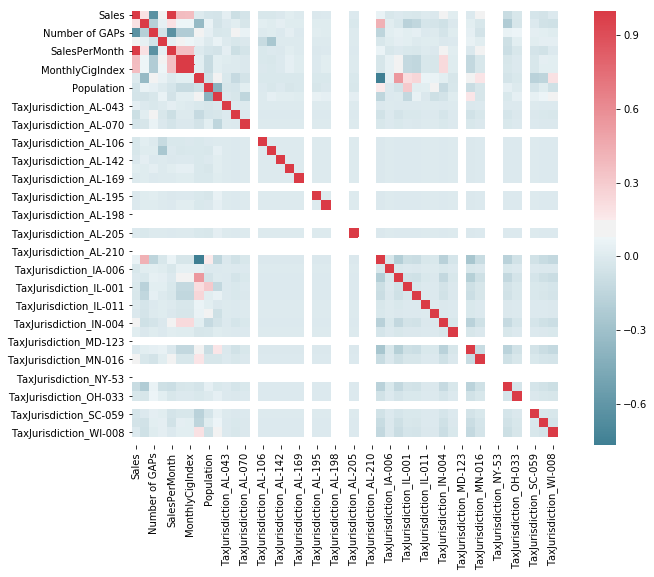

In [19]:
import seaborn as sns

f, ay = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ay)

In [20]:
from sklearn.model_selection import train_test_split
X1 = df[['MonthlyCigIndex','area','Number of GAPs','TaxJurisdiction_AL-058','TaxJurisdiction_IL-001',
                   'TaxJurisdiction_IL-007','TaxJurisdiction_IN-004','TaxJurisdiction_MI-013',
         'TaxJurisdiction_MN-016','TaxJurisdiction_OH-033','TaxJurisdiction_TN-088']]
X1 = sm.add_constant(X1)
y1 = df['SalesPerMonth']
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.20, random_state=42)
model = sm.OLS(y1, X1.astype(float)).fit()
predictions = model.predict(X1)
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:          SalesPerMonth   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     158.8
Date:                Tue, 03 Jul 2018   Prob (F-statistic):          2.62e-260
Time:                        11:23:45   Log-Likelihood:                -13621.
No. Observations:                1936   AIC:                         2.727e+04
Df Residuals:                    1924   BIC:                         2.733e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    711

In [21]:
df.head()

,Sold-to Customer,Sales,Account ID,area,Region,Customer Group,Number of GAPs,Active Month,SalesPerMonth,cig_index,...,TaxJurisdiction_MN-016,TaxJurisdiction_MO-027,TaxJurisdiction_NY-53,TaxJurisdiction_OH-014,TaxJurisdiction_OH-033,TaxJurisdiction_PA-055,TaxJurisdiction_SC-059,TaxJurisdiction_TN-088,TaxJurisdiction_WI-008,TaxJurisdiction_WV-032
0,10000,312.35,0016100000Am390AAB,32.0,MI,CSTORE-OVER 800SQFT,20.0,12,26.029167,1786.1,...,0,0,0,0,0,0,0,0,0,0
1,10010,6616.20,0016100000AmFkZAAV,60.0,MI,CSTORE-OVER 800SQFT,4.0,12,551.350000,188.0,...,0,0,0,0,0,0,0,0,0,0
3,10019,1041.17,0016100000Am393AAB,36.0,MI,CSTORE-OVER 800SQFT,14.0,12,86.764167,5780.0,...,0,0,0,0,0,0,0,0,0,0
4,10032,15739.22,00161000009lKUeAAM,36.0,MI,CSTORE-OVER 800SQFT,7.0,12,1311.601667,8181.7,...,0,0,0,0,0,0,0,0,0,0
5,10036,2256.23,00161000009lKUiAAM,32.0,MI,CSTORE-OVER 800SQFT,8.0,12,188.019167,2143.9,...,0,0,0,0,0,0,0,0,0,0


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X = df[['MonthlyCigIndex','area','Number of GAPs','TaxJurisdiction_AL-058','TaxJurisdiction_IL-001',
                   'TaxJurisdiction_IL-007','TaxJurisdiction_IN-004','TaxJurisdiction_MI-013',
         'TaxJurisdiction_MN-016','TaxJurisdiction_OH-033','TaxJurisdiction_TN-088']]
X = sm.add_constant(X)
y =  df['SalesPerMonth']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model= RandomForestRegressor(n_estimators=100, max_depth=2)
model.fit(X_train,y_train)
y_pred=model.predict(X_test) 
accuracy=round(model.score(X_test, y_test)*100,2)
print(str(accuracy)+' percent')

46.03 percent


In [23]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 78886.40
Variance score: 0.46


In [24]:
from sklearn.linear_model import LinearRegression
reg1=LinearRegression()
X = df[['MonthlyCigIndex','area','Number of GAPs','TaxJurisdiction_AL-058','TaxJurisdiction_IL-001',
                   'TaxJurisdiction_IL-007','TaxJurisdiction_IN-004','TaxJurisdiction_MI-013',
         'TaxJurisdiction_MN-016','TaxJurisdiction_OH-033','TaxJurisdiction_TN-088']]
X = sm.add_constant(X)
y =  df['SalesPerMonth']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
reg1.fit(X_train,y_train)
pred1=reg1.predict(X_test) 
accuracy=round(reg1.score(X_test, y_test)*100,2)
print(str(accuracy)+' percent')

51.61 percent


In [25]:
regr = linear_model.LinearRegression()
# The coefficients
#print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, pred1))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, pred1))

Mean squared error: 70727.09
Variance score: 0.52


In [1]:
plt.hist(df,bins=100)
plt.show()


NameError: name 'plt' is not defined